##                                Multiple Linear Regression Model 

### Housing Data 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
from sklearn.metrics import r2_score 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('V1.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


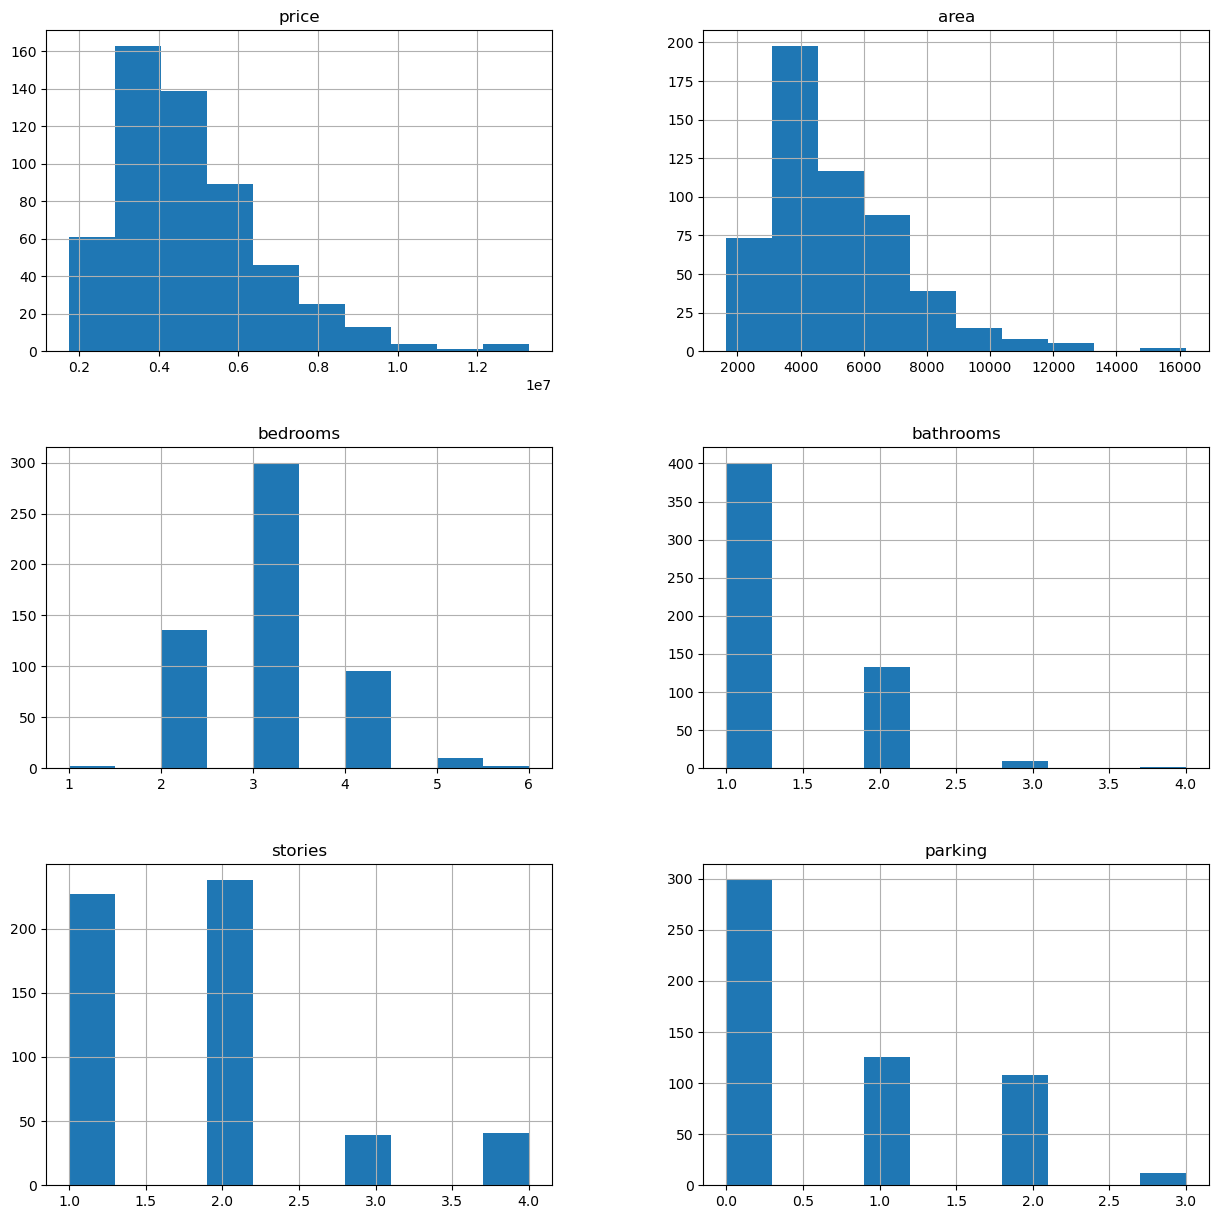

In [6]:
df.hist(figsize=(15,15))
plt.show()

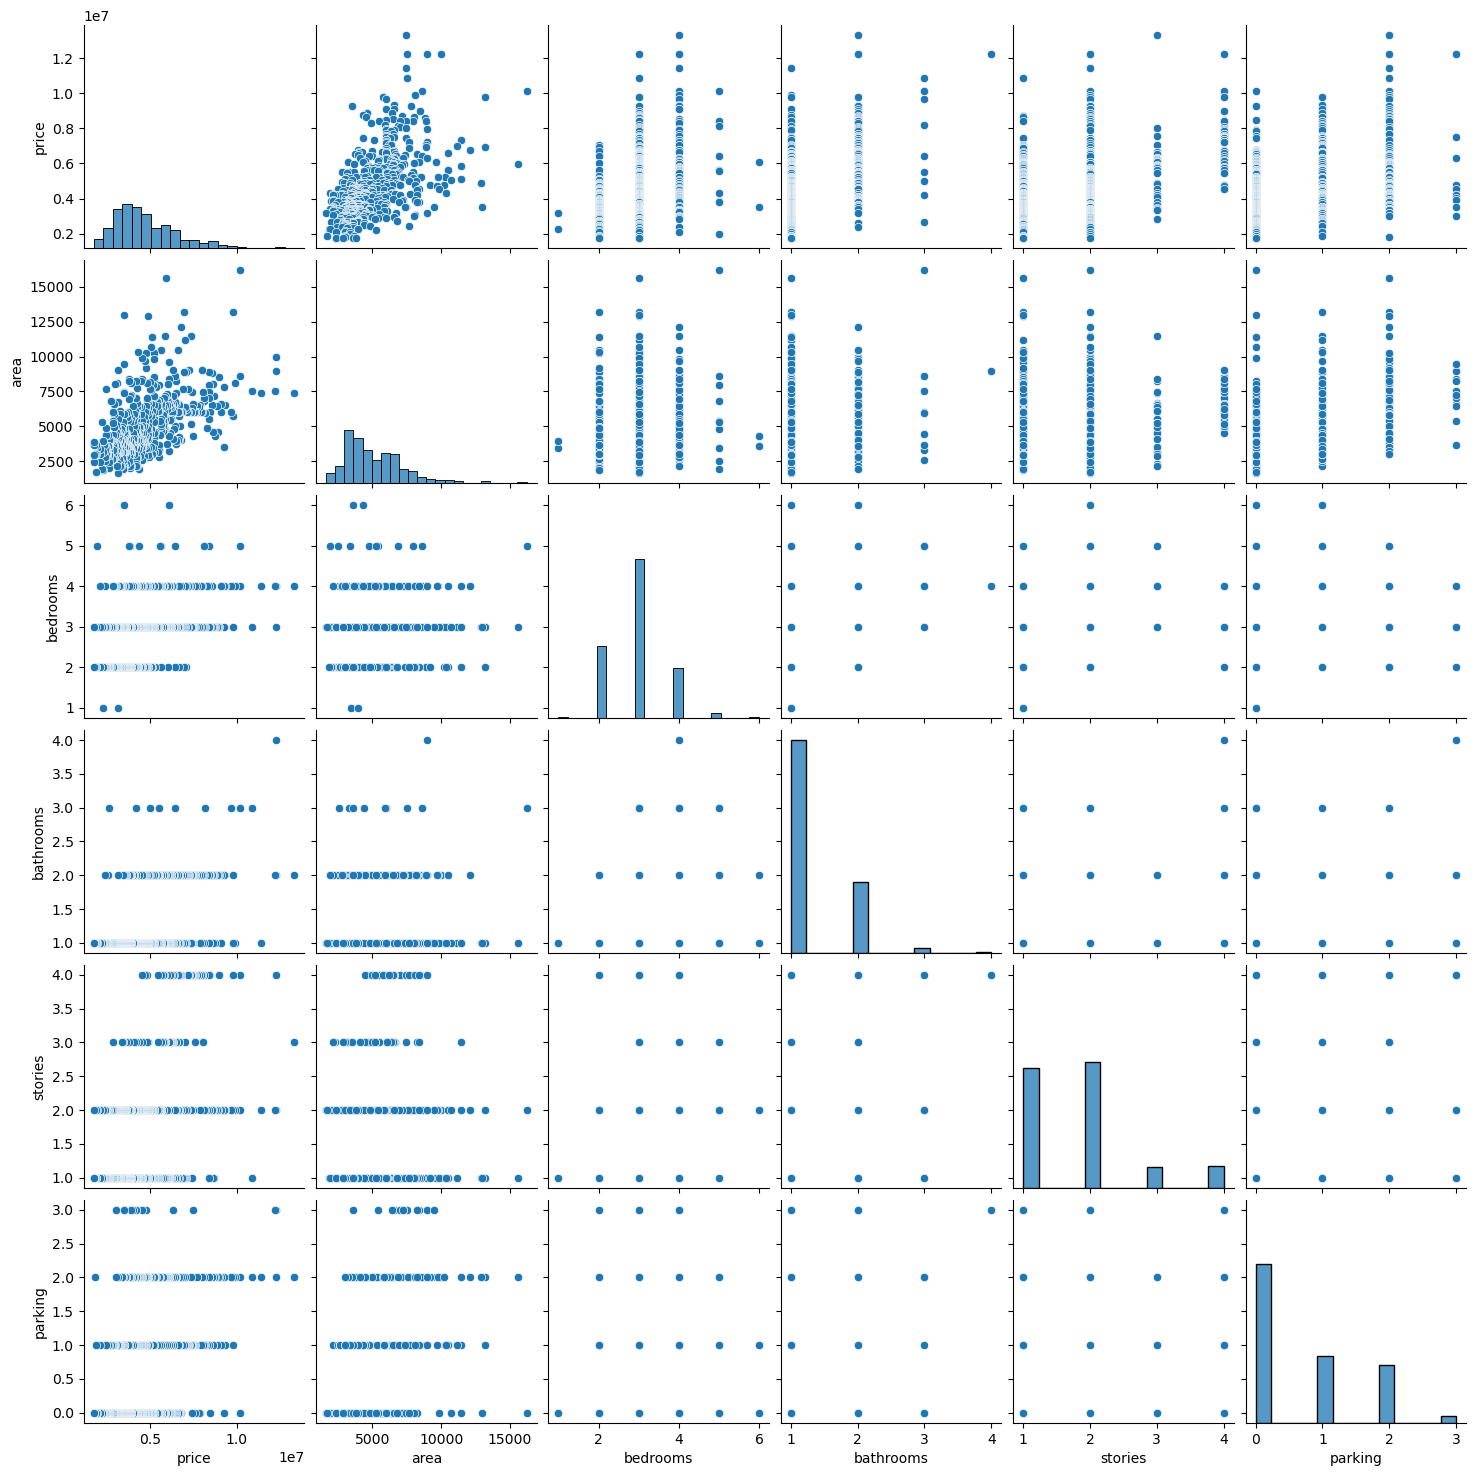

In [7]:
sns.pairplot(data=df)

<Axes: >

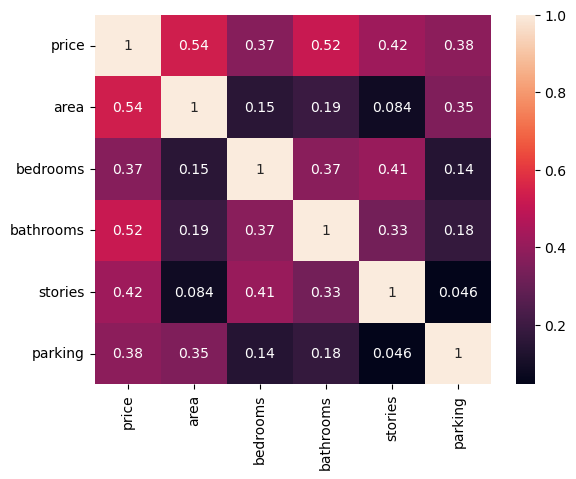

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
# visualise categorical variable 

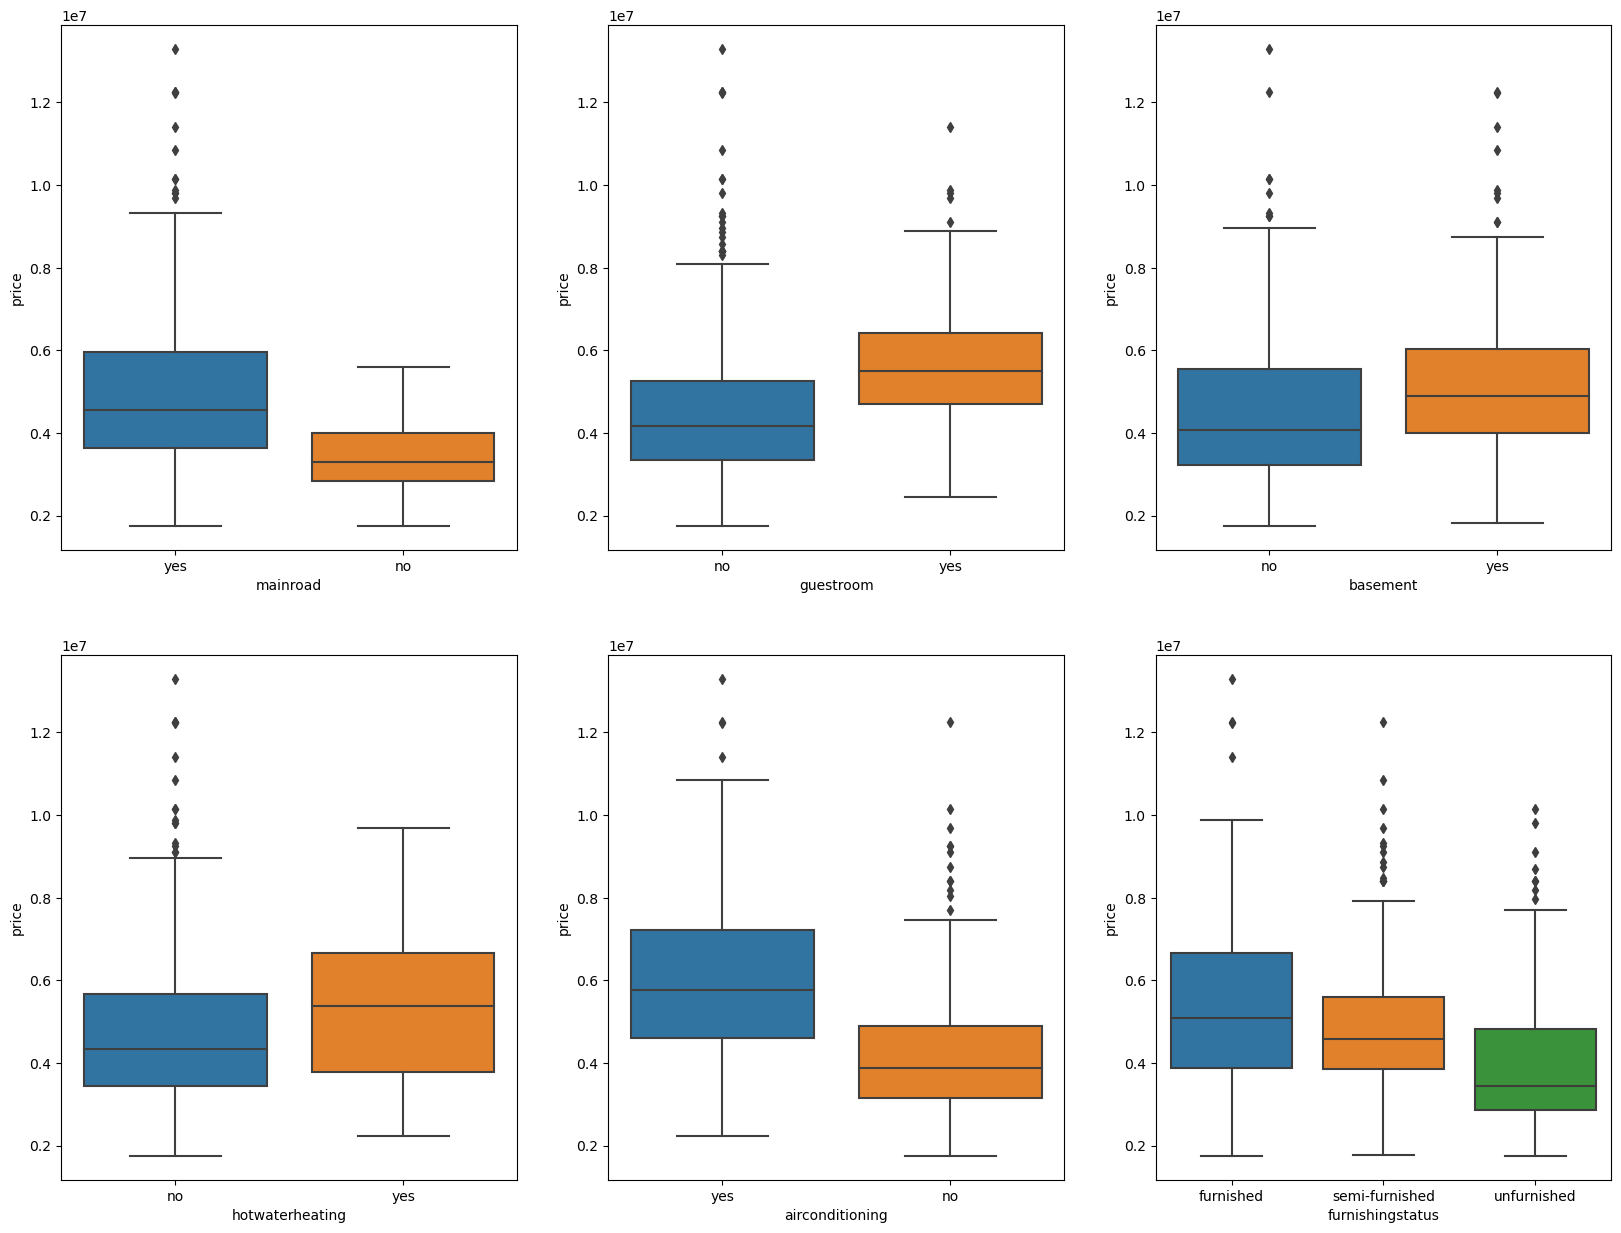

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.show()

## step 2 


### Data prepration for the model building

In [11]:
## mapping binary categorical to number varibles 
## other categorical vars to dummy vars

In [12]:
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [13]:
df[varlist]=df[varlist].apply(lambda x: x.map({'yes':1,'no':0}))

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [15]:
## furnishing status variable into numeric variable 

###  Dummy variables 

In [16]:
s=pd.get_dummies(df['furnishingstatus'],dtype=int,drop_first=True)
s

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [17]:
## Here furnished is 100 , semi furnished is 010 and un furnished is 000

In [18]:
#concat the dummy dataframe with original



In [19]:
df=pd.concat([df,s],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [20]:
df=df.drop('furnishingstatus',axis=1)

In [21]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


##### Spliting into train and test data set

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [74]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100,shuffle=True)

In [75]:
df_train.shape

(381, 14)

In [76]:
df_test.shape

(164, 14)

##### Rescaling the features 

In [77]:
# 1. Min-Max scaling (Normalization)
# 2. Standardization (mean-0 , std-1)

## No mapping of binary variable as they mean yes or no

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
sc=MinMaxScaler()
num=['area','bedrooms','bathrooms','stories','parking','price','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [84]:
# methods 
# fit()-->learn the xmax and xmin value for scaling the whole data frame 
# transform()-->then it compute x-xmin/xmax-xmin


# fit_transform()-->do both the tasks 

In [85]:
df_train[num]=sc.fit_transform(df_train[num])

In [86]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0,1


In [32]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the model

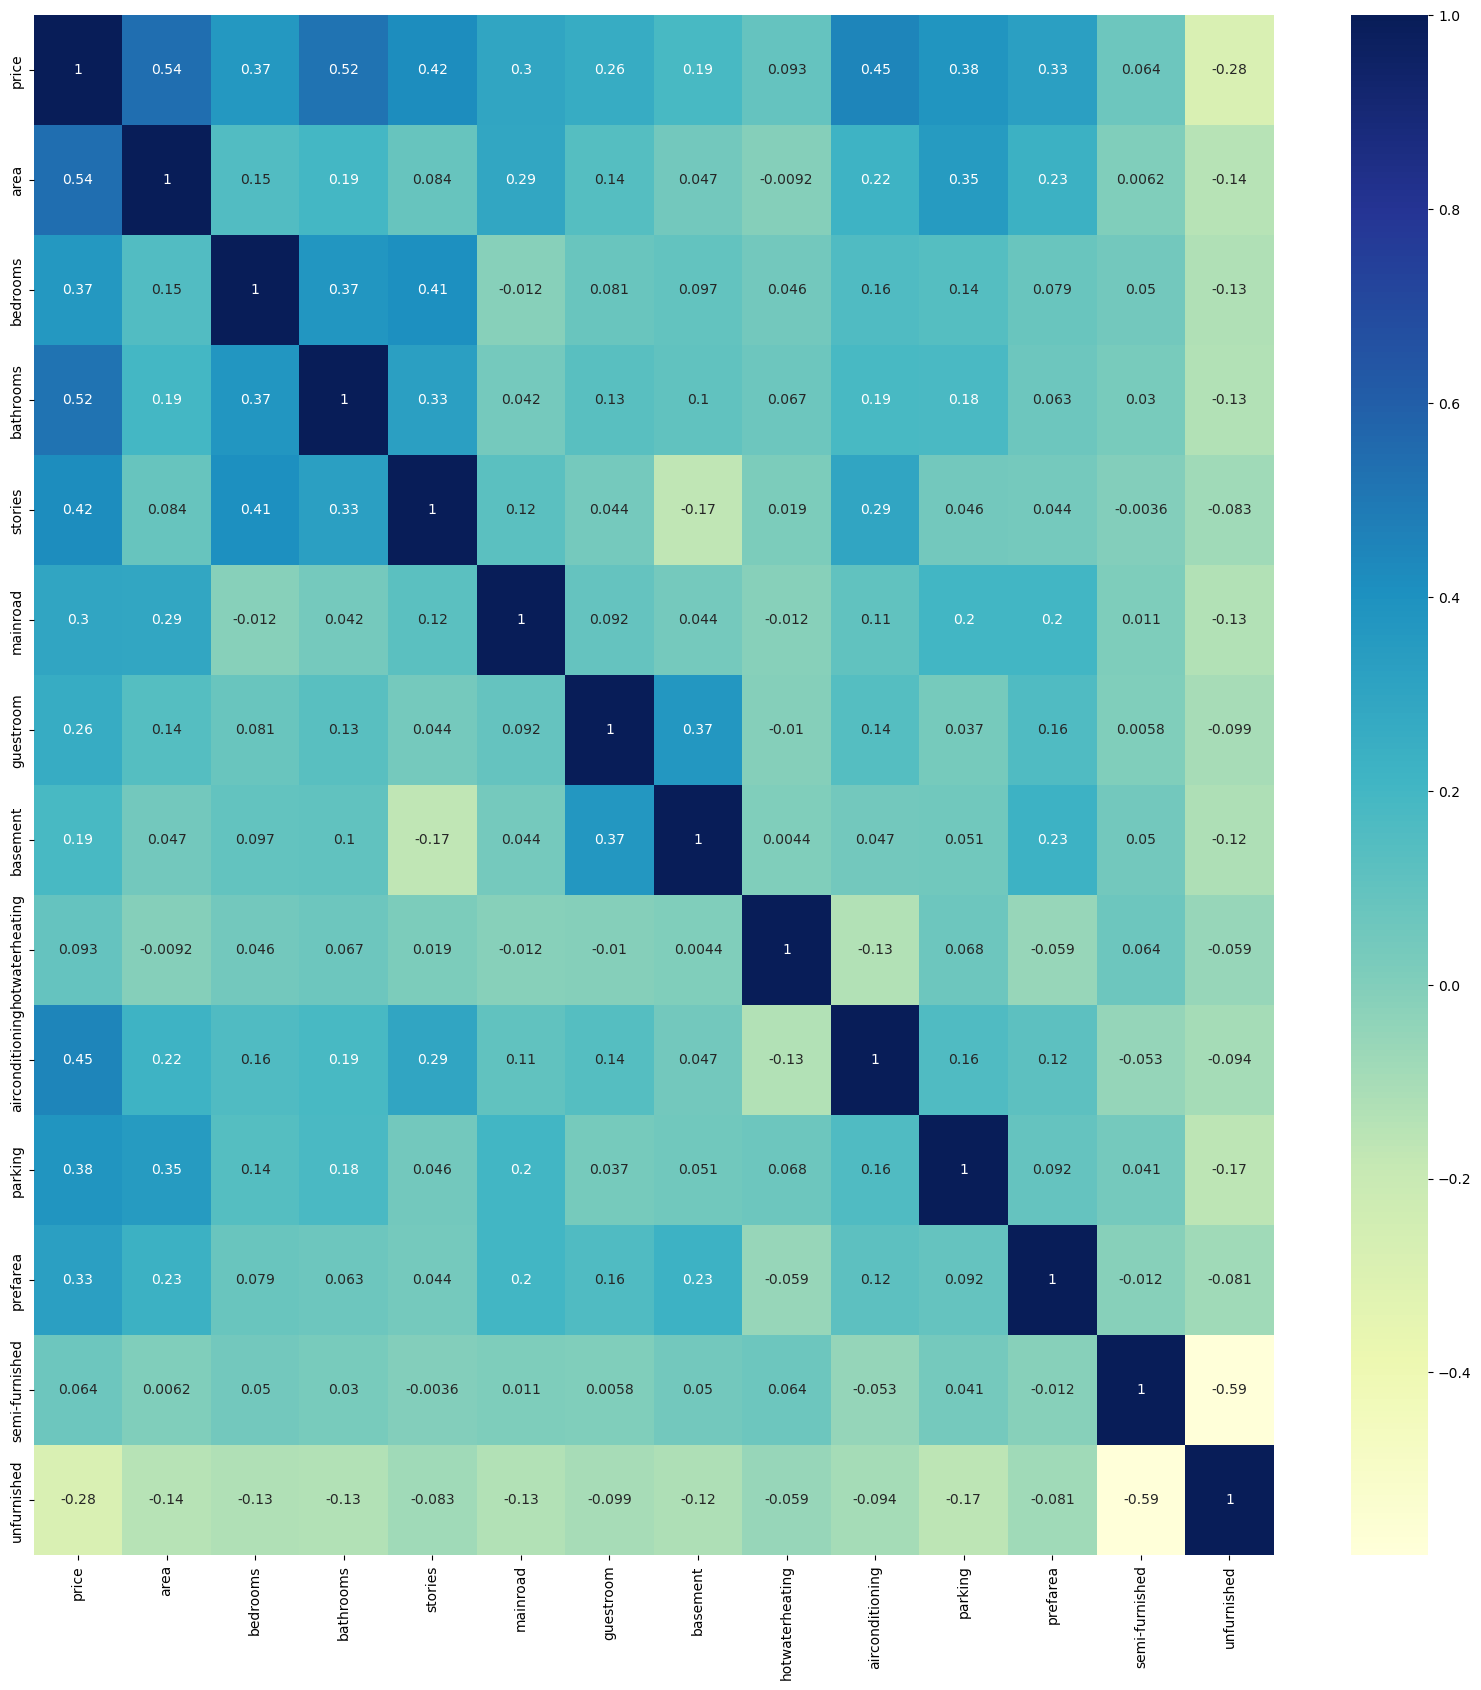

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [34]:
y_train=df_train.pop('price')
X_train=df_train

In [35]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


# Method 1

In [36]:
# - statistical significance of a variable


In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
X_train_sm=sm.add_constant(X_train['area'])

In [39]:
lr=sm.OLS(y_train,X_train_sm)

In [40]:
lr_model=lr.fit()

In [41]:
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [42]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           3.15e-29
Time:                        16:48:26   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# adding another variable 1-by-1

In [44]:
X_train_sm=X_train[['area','bathrooms','bedrooms','stories','airconditioning','parking','prefarea','mainroad','guestroom','semi-furnished','hotwaterheating','unfurnished']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.params)
lr_model.summary()

const              0.022264
area               0.233571
bathrooms          0.194118
bedrooms           0.058520
stories            0.097745
airconditioning    0.068454
parking            0.060180
prefarea           0.062977
mainroad           0.051625
guestroom          0.039384
semi-furnished     0.001184
hotwaterheating    0.085541
unfurnished       -0.031869
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     64.63
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           6.84e-83
Time:                        16:48:26   Log-Likelihood:                 379.84
No. Observations:                 381   AIC:                            -733.7
Df Residuals:                     368   BIC:                            -682.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0223      0.021      1.059      0.290      -0.019       0.064
area                0.2336      0.030      7.731      0.000       0.174       0.293
bathrooms           0.1941      0.022      8.822      0.000       0.151       0.237
bedrooms            0.0585      0.037      1.602      0.110      -0.013       0.130
stories             0.0977      0.018      5.307      0.000       0.062       0.134
airconditioning     0.0685      0.011      6.030      0.000       0.046       0.091
parking             0.0602      0.018      3.322      0.001       0.025       0.096
prefarea            0.0630      0.012      5.386      0.000       0.040       0.086
mainroad            0.0516      0.014      3.593      0.000       0.023       0.080
guestroom           0.0394      0.013      3.061      0.002       0.014       0.065
semi-furnished      0.0012      0.012      0.100      0.920      -0.022       0.024
hotwaterheating     0.0855      0.022      3.951      0.000       0.043       0.128
unfurnished        -0.0319      0.013     -2.500      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       92.464   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.161
Skew:                           1.079   Prob(JB):                     1.80e-65
Kurtosis:                       6.758   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Method 2

In [45]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [46]:
x_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.params)
lr_model.summary()

const              0.022264
area               0.233571
bathrooms          0.194118
bedrooms           0.058520
stories            0.097745
airconditioning    0.068454
parking            0.060180
prefarea           0.062977
mainroad           0.051625
guestroom          0.039384
semi-furnished     0.001184
hotwaterheating    0.085541
unfurnished       -0.031869
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     64.63
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           6.84e-83
Time:                        16:48:26   Log-Likelihood:                 379.84
No. Observations:                 381   AIC:                            -733.7
Df Residuals:                     368   BIC:                            -682.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0223      0.021      1.059      0.290      -0.019       0.064
area                0.2336      0.030      7.731      0.000       0.174       0.293
bathrooms           0.1941      0.022      8.822      0.000       0.151       0.237
bedrooms            0.0585      0.037      1.602      0.110      -0.013       0.130
stories             0.0977      0.018      5.307      0.000       0.062       0.134
airconditioning     0.0685      0.011      6.030      0.000       0.046       0.091
parking             0.0602      0.018      3.322      0.001       0.025       0.096
prefarea            0.0630      0.012      5.386      0.000       0.040       0.086
mainroad            0.0516      0.014      3.593      0.000       0.023       0.080
guestroom           0.0394      0.013      3.061      0.002       0.014       0.065
semi-furnished      0.0012      0.012      0.100      0.920      -0.022       0.024
hotwaterheating     0.0855      0.022      3.951      0.000       0.043       0.128
unfurnished        -0.0319      0.013     -2.500      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       92.464   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.161
Skew:                           1.079   Prob(JB):                     1.80e-65
Kurtosis:                       6.758   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# significance -- (p-values )
# VIF-- multicollinearity

### VIF

In [48]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values , i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We could have :
- High p , high VIF : > drop
- Low p , low VIF : > keep
- high-low : 
    - High p , low VIF: >  remove these first, and removing this you will calculate the vif again 
    - Low p, high VIF: > 
 
VIF higher than 5 , need to remove 

In [49]:
X=X_train.drop('semi-furnished',axis=1)

In [50]:
x_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
print(lr_model.params)
lr_model.summary()

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.07e-83
Time:                        16:48:26   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#- Remove bedroom , high p , high vif

In [52]:
X=X.drop('bedrooms',axis=1)

In [53]:
x_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
print(lr_model.params)
lr_model.summary()

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           2.73e-84
Time:                        16:48:27   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


# Step -4 residual analyis 

In [55]:
y_train_pred=lr_model.predict(x_train_sm)

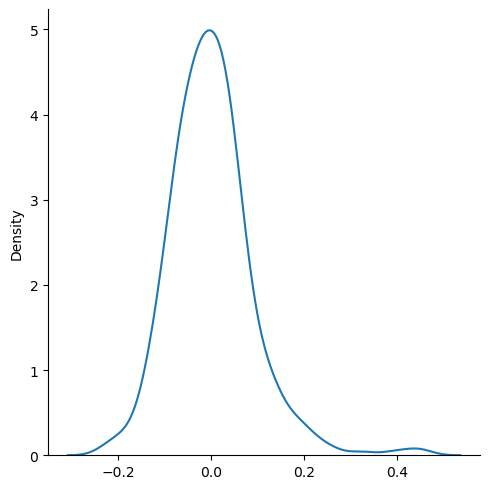

In [56]:
residual = y_train - y_train_pred
sns.displot(residual,kind='kde')

# Step -4 prediction and evaluation of test set



##### the test set is a raw data , you don't have any knowledge about it , you can't  modify the test set according to your prefrence as with the training set , you can't use the fit_transform in test set , you manualy have to fit the data then the transform to convert the data into standardized form 



In [57]:
df_test[num]=sc.transform(df_test[num])

In [58]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [59]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
y_test=df_test.pop('price')

In [61]:
X_test=df_test

In [62]:
# add a constant to x_test to make predictions
X=sm.add_constant(X_test)

# removing the variables which we have removed from the training set
X=X.drop(['bedrooms','semi-furnished'],axis=1)

In [63]:
y_test_pred=lr_model.predict(X)

In [64]:
residual=y_test-y_test_pred

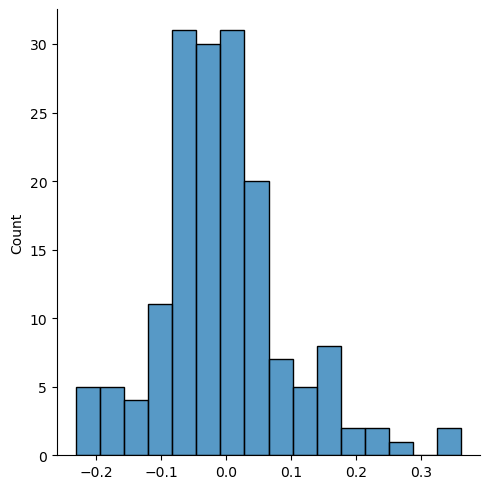

In [65]:
sns.displot(residual,kind='hist')

In [66]:
# evalute 

In [67]:
after=r2_score(y_true=y_test,y_pred=y_test_pred)

In [68]:
before=r2_score(y_true=y_train,y_pred=y_train_pred)

In [69]:
abs(after-before)

0.008742494578511284